# Refactoring Trees

In [20]:
%matplotlib inline

## Original Code

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt
s=1
d=[[0,1,0]]
plt.plot([0,0],[0,1])
for i in range(5):
    n=[]
    for j in range(len(d)):
        n.append([d[j][0]+s*sin(d[j][2]-0.2), d[j][1]+s*cos(d[j][2]-0.2), d[j][2]-0.2])
        n.append([d[j][0]+s*sin(d[j][2]+0.2), d[j][1]+s*cos(d[j][2]+0.2), d[j][2]+0.2])
        plt.plot([d[j][0], n[-2][0]],[d[j][1], n[-2][1]])
        plt.plot([d[j][0], n[-1][0]],[d[j][1], n[-1][1]])
    d=n
    s*=0.6
#plt.savefig('tree.png')

## Refactoring 1 - Replace Numbers

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt
num_branches = 5
angle_change = 0.2
length_change = 0.6
angle_init = 0
tree_start = 0
s=1
d=[[tree_start, s, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, s])
for i in range(num_branches):
    n=[]
    for j in range(len(d)):
        n.append([d[j][0]+s*sin(d[j][2]-angle_change), d[j][1]+s*cos(d[j][2]-angle_change), d[j][2]-angle_change])
        n.append([d[j][0]+s*sin(d[j][2]+angle_change), d[j][1]+s*cos(d[j][2]+angle_change), d[j][2]+angle_change])
        plt.plot([d[j][0], n[-2][0]],[d[j][1], n[-2][1]])
        plt.plot([d[j][0], n[-1][0]],[d[j][1], n[-1][1]])
    d=n
    s*=length_change
#plt.savefig('tree.png')

## Refactoring 2 - Rename Variables

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt
num_branches = 5
angle_init = 0
angle_change = 0.2
length=1
length_change = 0.6
tree_start = 0
branch_start=[[tree_start, length, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, length])
for i in range(num_branches):
    branch_end=[]
    for j in range(len(branch_start)):
        branch_end.append([branch_start[j][0]+length*sin(branch_start[j][2]-angle_change), 
                           branch_start[j][1]+length*cos(branch_start[j][2]-angle_change), branch_start[j][2]-angle_change])
        branch_end.append([branch_start[j][0]+length*sin(branch_start[j][2]+angle_change), 
                           branch_start[j][1]+length*cos(branch_start[j][2]+angle_change), branch_start[j][2]+angle_change])
        plt.plot([branch_start[j][0], branch_end[-2][0]],[branch_start[j][1], branch_end[-2][1]])
        plt.plot([branch_start[j][0], branch_end[-1][0]],[branch_start[j][1], branch_end[-1][1]])
    branch_start=branch_end
    length*=length_change
#plt.savefig('tree.png')

## Refactoring 3 - Replace Loop With Iterator

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt
num_branches = 5
angle_init = 0
angle_change = 0.2
length=1
length_change = 0.6
tree_start = 0
branch_start=[[tree_start, length, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, length])
for i in range(num_branches):
    branch_end=[]
    for branch in branch_start:
        branch_end.append([branch[0]+length*sin(branch[2]-angle_change), 
                           branch[1]+length*cos(branch[2]-angle_change), branch[2]-angle_change])
        branch_end.append([branch[0]+length*sin(branch[2]+angle_change), 
                           branch[1]+length*cos(branch[2]+angle_change), branch[2]+angle_change])
        plt.plot([branch[0], branch_end[-2][0]],[branch[1], branch_end[-2][1]])
        plt.plot([branch[0], branch_end[-1][0]],[branch[1], branch_end[-1][1]])
    branch_start=branch_end
    length*=length_change
#plt.savefig('tree.png')

## Refactoring 4 - Replace Repeated Code with a Function

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt

def extend_branch(branch, angle_change):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]

num_branches = 5
angle_init = 0
angle_change = 0.2
length=1
length_change = 0.6
tree_start = 0
branch_start=[[tree_start, length, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, length])
for i in range(num_branches):
    branch_end=[]
    for branch in branch_start:
        for angle in [-angle_change, angle_change]:
            branch_end.append(extend_branch(branch, angle))
    branch_start=branch_end
    length*=length_change
#plt.savefig('tree.png')

## Refactoring 4 - Replace Repeated Code with a Function

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt

def extend_branch(branch, length, angle_change):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]

def extend_tree(branches, length, angle_change):
    new_branches = []
    for branch in branches:
        for angle in [-angle_change, angle_change]:
            new_branches.append(extend_branch(branch, length, angle))
    return new_branches
    
num_branches = 5
angle_init = 0
angle_change = 0.2
length=1
length_change = 0.6
tree_start = 0
branch_start=[[tree_start, length, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, length])
for i in range(num_branches):
    branch_end = extend_tree(branch_start, length, angle_change)
    branch_start = branch_end
    length *= length_change
#plt.savefig('tree.png')

## Refactoring 5 - Replace for loop with while loop

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt

def extend_branch(branch, length, angle_change):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]

def extend_tree(branches, length, angle_change):
    new_branches = []
    for branch in branches:
        for angle in [-angle_change, angle_change]:
            new_branches.append(extend_branch(branch, length, angle))
    return new_branches
    
num_branches = 5
angle_init = 0
angle_change = 0.2
length=1
length_change = 0.6
tree_start = 0
branch_start=[[tree_start, length, angle_init]]
plt.plot([tree_start, tree_start],[tree_start, length])
count = 0
while count < num_branches:
    branch_end = extend_tree(branch_start, length, angle_change)
    branch_start = branch_end
    length *= length_change
    count += 1
#plt.savefig('tree.png')

### Refactoring 5 - Clean up variables

In [ ]:
from math import sin, cos
from matplotlib import pyplot as plt

def extend_branch(branch, length, angle_change):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]

def extend_tree(branches, length, angle_change):
    new_branches = []
    for branch in branches:
        for angle in [-angle_change, angle_change]:
            new_branches.append(extend_branch(branch, length, angle))
    return new_branches
    
num_branches = 5
angle = {'start': 0, 'update': 0.2}
length = {'current': 1, 'update': 0.6}
branch_start=[[0, length['current'], angle['start']]]
plt.plot([0, 0],[0, length['current']])
count = 0
while count < num_branches:
    branch_end = extend_tree(branch_start, length['current'], angle['update'])
    branch_start = branch_end
    length['current'] *= length['update']
    count += 1
#plt.savefig('tree.png')

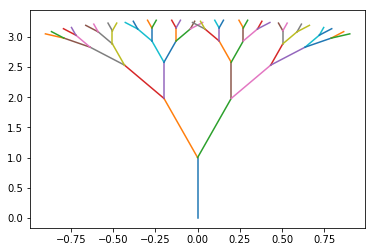

In [21]:
from math import sin, cos
from matplotlib import pyplot as plt

def initialise_tree(initial_tree):
    plt.plot(initial_tree['x_coords'],initial_tree['y_coords'])
    return [[initial_tree['x_coords'][1], initial_tree['y_coords'][1], initial_tree['angle']]]

def extend_tree(branches, length, angle_change):
    new_branches = []
    for branch in branches:
        for angle in [-angle_change, angle_change]:
            new_branches.append(extend_branch(branch, length, angle))
    return new_branches

def extend_branch(branch, length, angle_change):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]
    
tree_levels = 5
angle = {'start': 0, 'update': 0.2}
length = {'current': 1, 'update': 0.6}
tree_trunk = {'x_coords': [0, 0], 'y_coords': [0, 1], 'angle': 0}
branches = initialise_tree(tree_trunk)
count = 0
while count < tree_levels:
    branches = extend_tree(branches, length['current'], angle['update'])
    length['current'] *= length['update']
    count += 1
#plt.savefig('tree.png')

### Refactoring 6 - Put into class

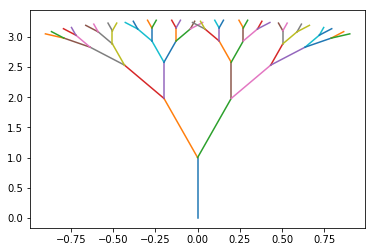

In [38]:
from math import sin, cos
from matplotlib import pyplot as plt
from argparse import ArgumentParser
        
def build_tree(levels, angle_change, length, length_change, plot_tree):
    branches = initialise_tree(length, plot_tree)
    count = 0
    while count < levels:
        branches = extend_tree(branches, length, angle_change, plot_tree)
        length *= length_change
        count += 1
    if plot_tree:
        plt.show()
        #plt.savefig('tree.png')
    
def initialise_tree(length, plot_tree):
    if plot_tree:
        plt.plot([0, 0], [0, length])
    return [[0, length, 0]]

def extend_tree(branches, length, angle_change, plot_tree):
    new_branches = []
    for branch in branches:
        for angle in [-angle_change, angle_change]:
            new_branches.append(extend_branch(branch, length, angle, plot_tree))
    return new_branches

def extend_branch(branch, length, angle_change, plot_tree):
    x_coord = branch[0]+length*sin(branch[2]+angle_change)
    y_coord = branch[1]+length*cos(branch[2]+angle_change)
    new_angle = branch[2]+angle_change
    if plot_tree:
        plt.plot([branch[0], x_coord],[branch[1], y_coord])
    return [x_coord, y_coord, new_angle]
    
def process():
    parser = ArgumentParser(description="Build a tree")
    parser.add_argument("levels", help="Number of tree levels above trunk", type=int)
    parser.add_argument("angle_change", help="Increment / decrement to angle of branches", type=float)
    parser.add_argument("length", help="Tree branch length", type=float)
    parser.add_argument("length_change", help="Change in branch length after each level", type=float)
    parser.add_argument('--plot_tree', help="Flag to turn plotting on/off", default=False, type=bool)
    args = parser.parse_args()
    new_tree = build_tree(args.levels, args.angle_change, args.length, args.length_change, args.plot_tree)
    
if __name__ == "__main__":
    process()

tree_levels = 5
angle_change = 0.2
length = 1
length_change = 0.6
plot_tree = True
new_tree = build_tree(tree_levels, angle_change, length, length_change, plot_tree)

## Numpy

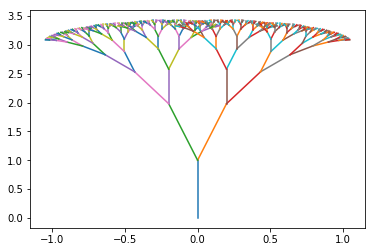

In [126]:
from math import sin, cos
from matplotlib import pyplot as plt
import numpy as np
from argparse import ArgumentParser
        
def build_tree(levels, angle_change, length, length_change, plot_tree):
    branches = initialise_tree(length, plot_tree)
    count = 0
    while count < levels:
        extend_tree_plus = extend_branch(branches, length, angle_change, plot_tree)
        extend_tree_minus = extend_branch(branches, length, -angle_change, plot_tree)
        branches = np.hstack((extend_tree_plus, extend_tree_minus))
        length *= length_change
        count += 1
    if plot_tree:
        plt.show()
        #plt.savefig('tree.png')
    
def initialise_tree(length, plot_tree):
    new_branches = np.array([0, length, 0],dtype=float)
    if plot_tree:
        plot_branches(np.array([0, 0, 0]), new_branches)
    return new_branches

def extend_branch(branches, length, angle_change, plot_tree):
    new_branches = np.copy(branches)
    new_angle = branches[2::3] + angle_change
    new_branches[::3] = branches[::3] + length*np.sin(new_angle)
    new_branches[1::3] = branches[1::3] + length*np.cos(new_angle)
    new_branches[2::3] = new_angle
    if plot_tree:
        plot_branches(branches, new_branches)
    return new_branches

def plot_branches(branches, new_branches):
    branches_reshape = np.reshape(branches,(int(len(new_branches)/3),3))
    new_branches_reshape = np.reshape(new_branches,(int(len(new_branches)/3),3))
    for i in range(branches_reshape.shape[0]):
        plt.plot([branches_reshape[i][0], new_branches_reshape[i][0]],
                 [branches_reshape[i][1], new_branches_reshape[i][1]])

tree_levels = 8
angle_change = 0.2
length = 1
length_change = 0.6
plot_tree = True
new_tree = build_tree(tree_levels, angle_change, length, length_change, plot_tree)

In [97]:
tmp1 = initialise_tree(length, plot_tree)
tmp2 = initialise_tree(length+2, plot_tree)
tmp3 = np.hstack((tmp1,tmp2))
tmp4 = np.reshape(tmp3,(int(len(tmp3)/3),3))
[n for n in tmp4]
tmp4.shape[0]

2